In [ ]:
# sklearn imports
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# import knee detection algorithm
from kneed import KneeLocator

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

In [ ]:
df = pd.read_csv('clusteringweek06.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

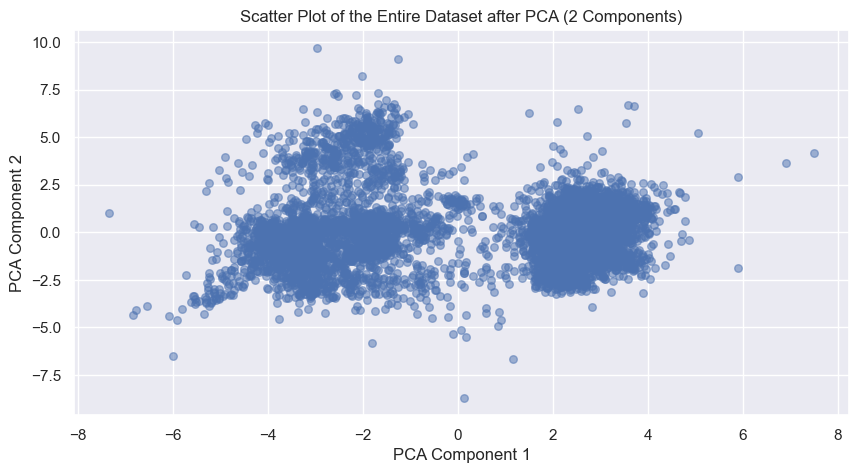

In [ ]:
# Scaling Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
#
#  Reduksi dimensi ke 2 komponen utama dengan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot data hasil PCA
plt.figure(figsize=(10, 5))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=30, color='b', alpha=0.5)
plt.title("Scatter Plot of the Entire Dataset after PCA (2 Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Optimal number of clusters based on the elbow method: 7


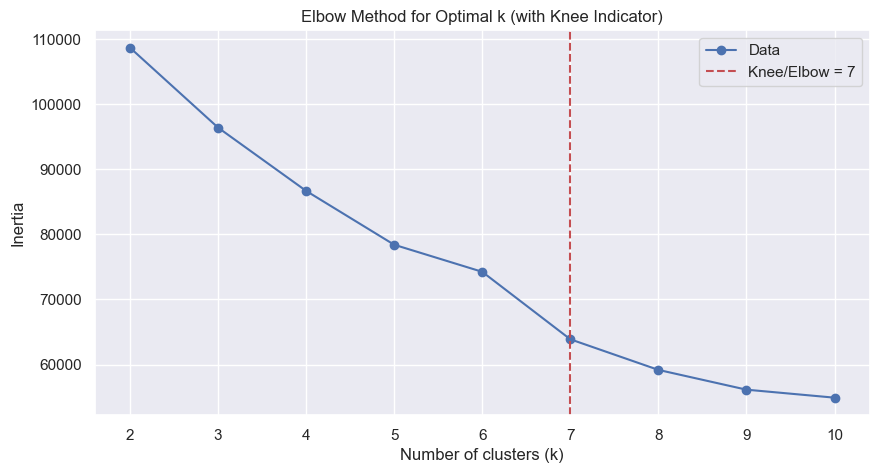

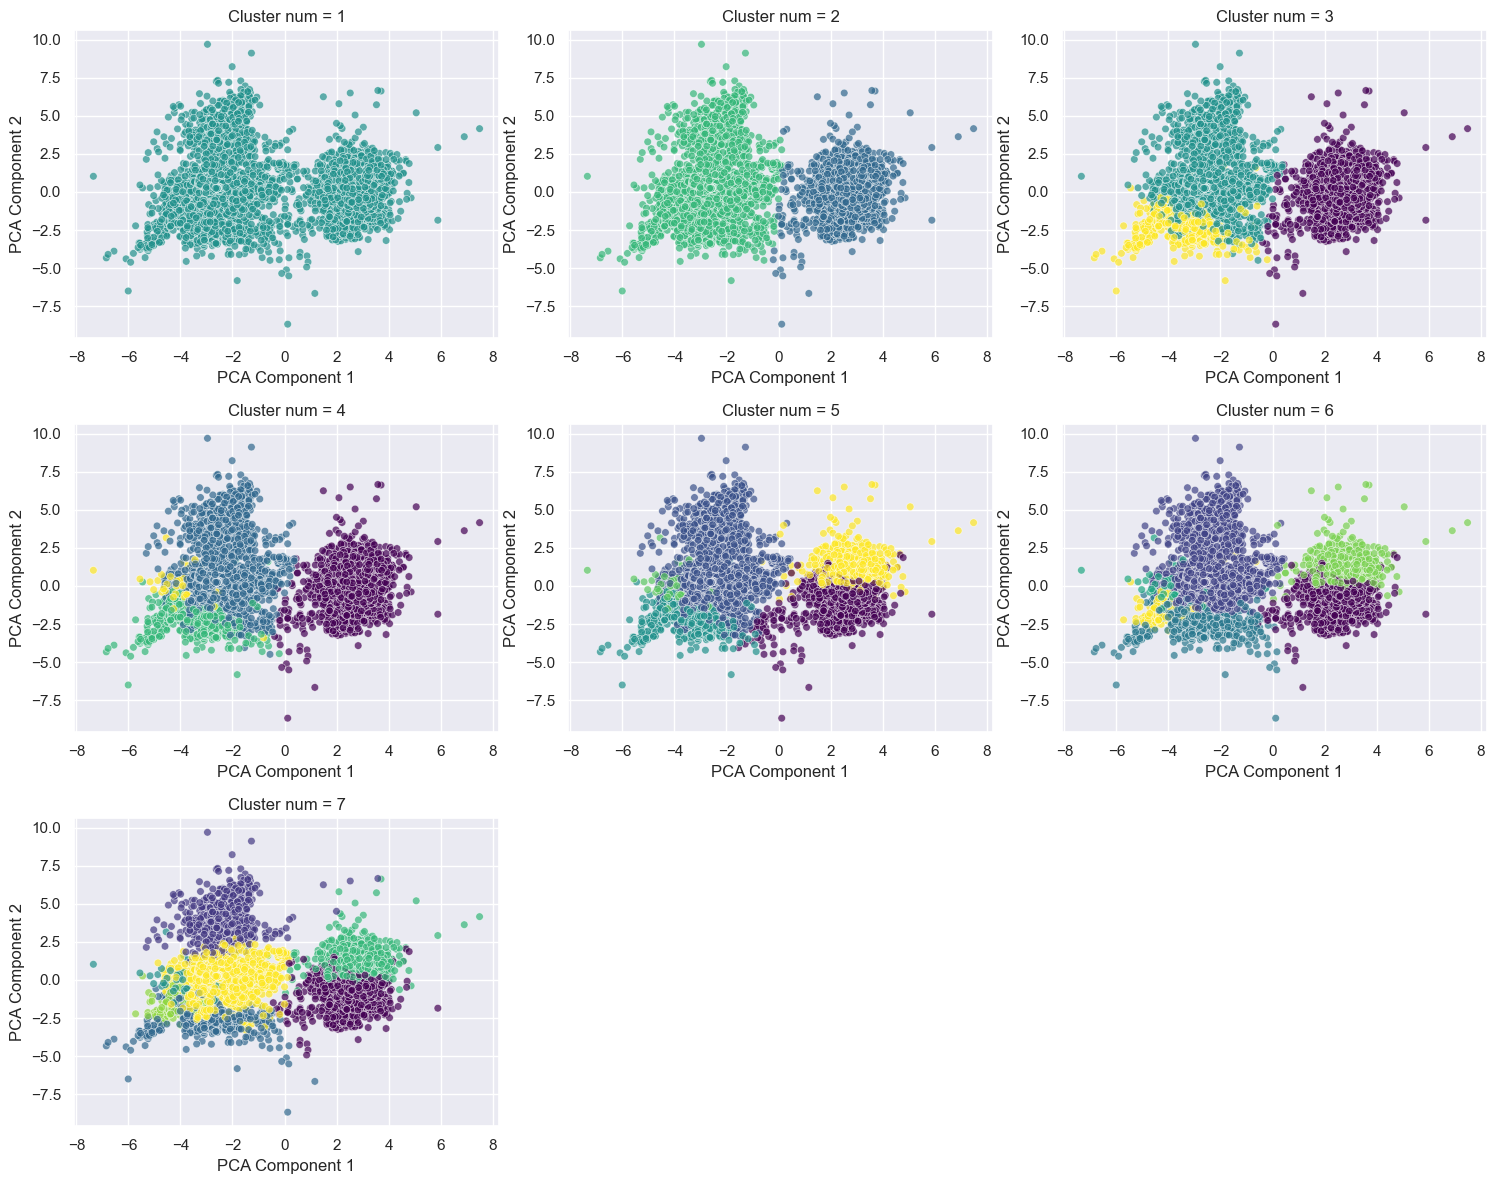

K-Means Silhouette Score: 0.28063884572620096
K-Means Davies-Bouldin Score: 1.3374096898415169
K-Means Calinski-Harabasz Score: 1770.3195980659737
Hierarchical Silhouette Score: 0.261455585018418
Hierarchical Davies-Bouldin Score: 1.34408338535116
Hierarchical Calinski-Harabasz Score: 1730.6620616902078


In [ ]:
# Step 3: Determine the optimal k using the Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)  # Start from 2 clusters as silhouette_score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Finding the "elbow" in the inertia plot
knee_locator = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Print the optimal k value based on the elbow method
print(f"Optimal number of clusters based on the elbow method: {optimal_k}")

# Step 4: Visualize the Elbow Method with Knee Indicator
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, marker='o', label='Data')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Knee/Elbow = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (with Knee Indicator)')
plt.legend()
plt.show()

# Step 5: Visualize clustering results for k values from 1 to 7
k_range_plot = range(1, 8)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, k in enumerate(k_range_plot):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    # Scatter plot for each k value
    sns.scatterplot(
        x=data_pca[:, 0],
        y=data_pca[:, 1],
        hue=kmeans_labels,
        palette="viridis",
        ax=axes[i],
        s=30,
        alpha=0.7,
        legend=False
    )
    axes[i].set_title(f'Cluster num = {k}')
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

# Remove any unused subplots
for j in range(len(k_range_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the clustering result plots
plt.tight_layout()
plt.show()

# Step 6: Apply K-Means and Hierarchical Clustering with the optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_labels = kmeans_final.fit_predict(data_scaled)

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Step 7: Evaluate clustering with different metrics
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(data_scaled, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(data_scaled, kmeans_labels)

hierarchical_silhouette = silhouette_score(data_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(data_scaled, hierarchical_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(data_scaled, hierarchical_labels)

# Print evaluation metrics for both clustering methods
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Score: {kmeans_davies_bouldin}")
print(f"K-Means Calinski-Harabasz Score: {kmeans_calinski_harabasz}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
print(f"Hierarchical Davies-Bouldin Score: {hierarchical_davies_bouldin}")
print(f"Hierarchical Calinski-Harabasz Score: {hierarchical_calinski_harabasz}")

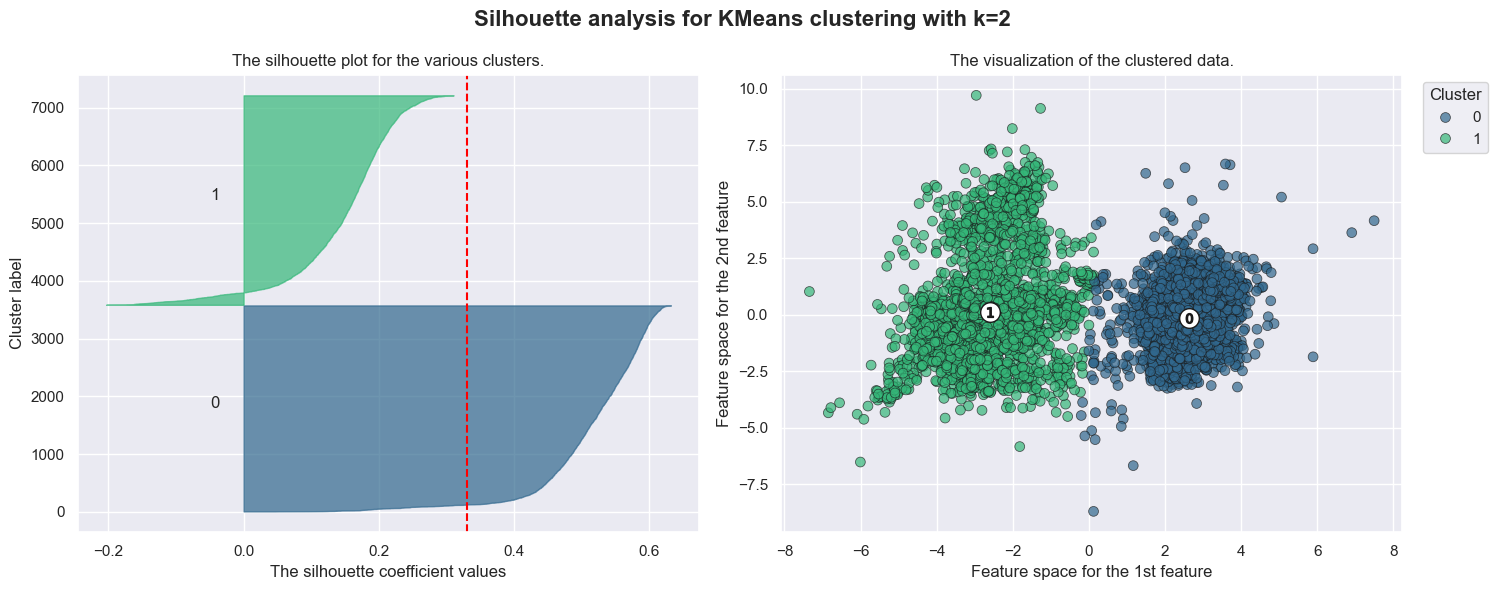

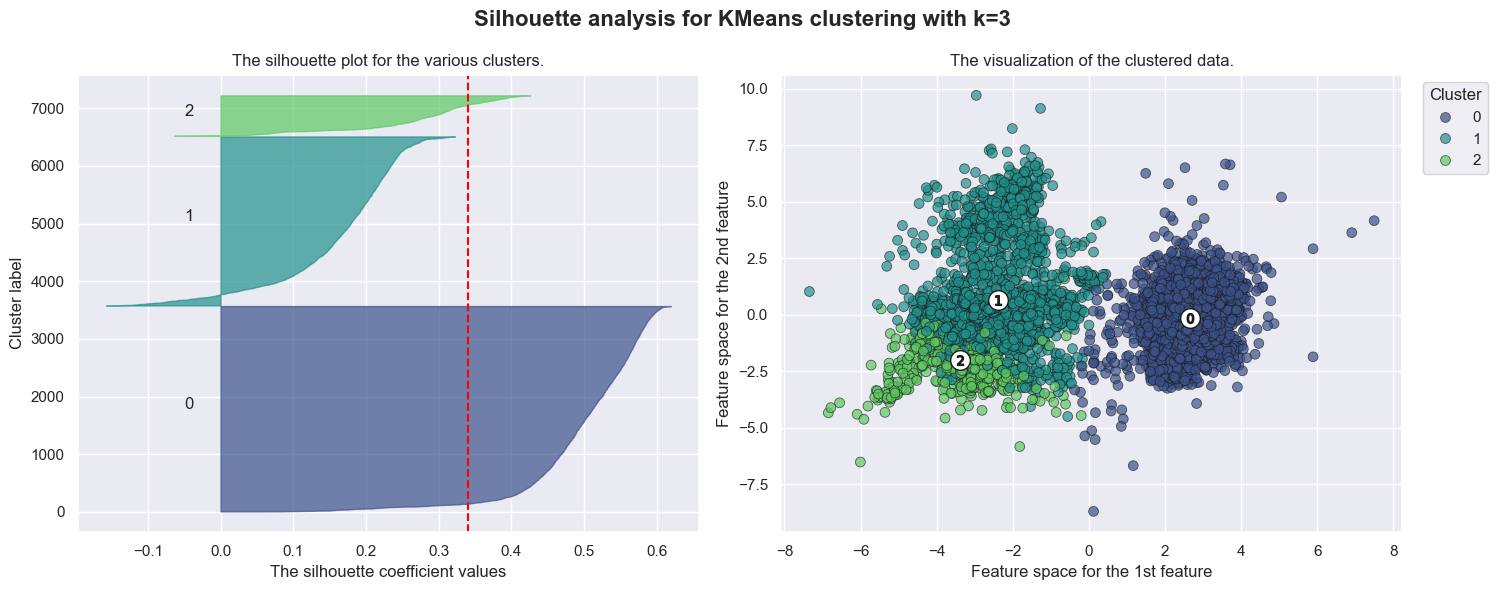

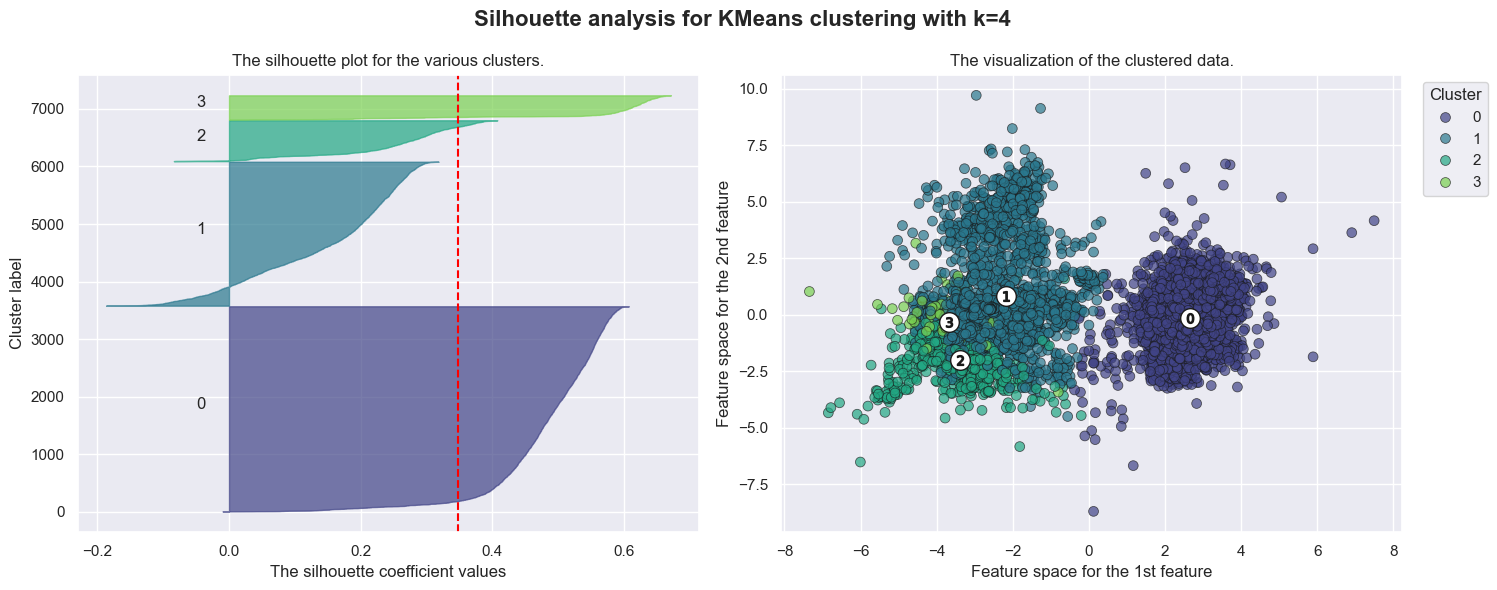

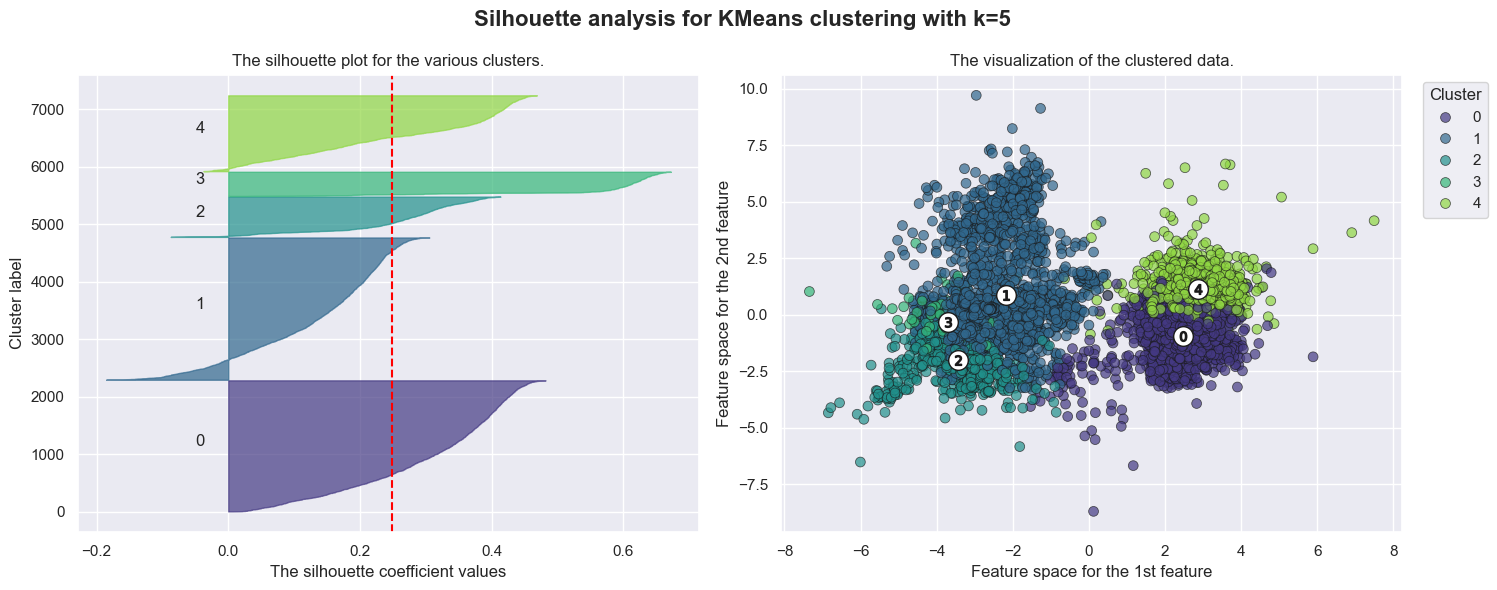

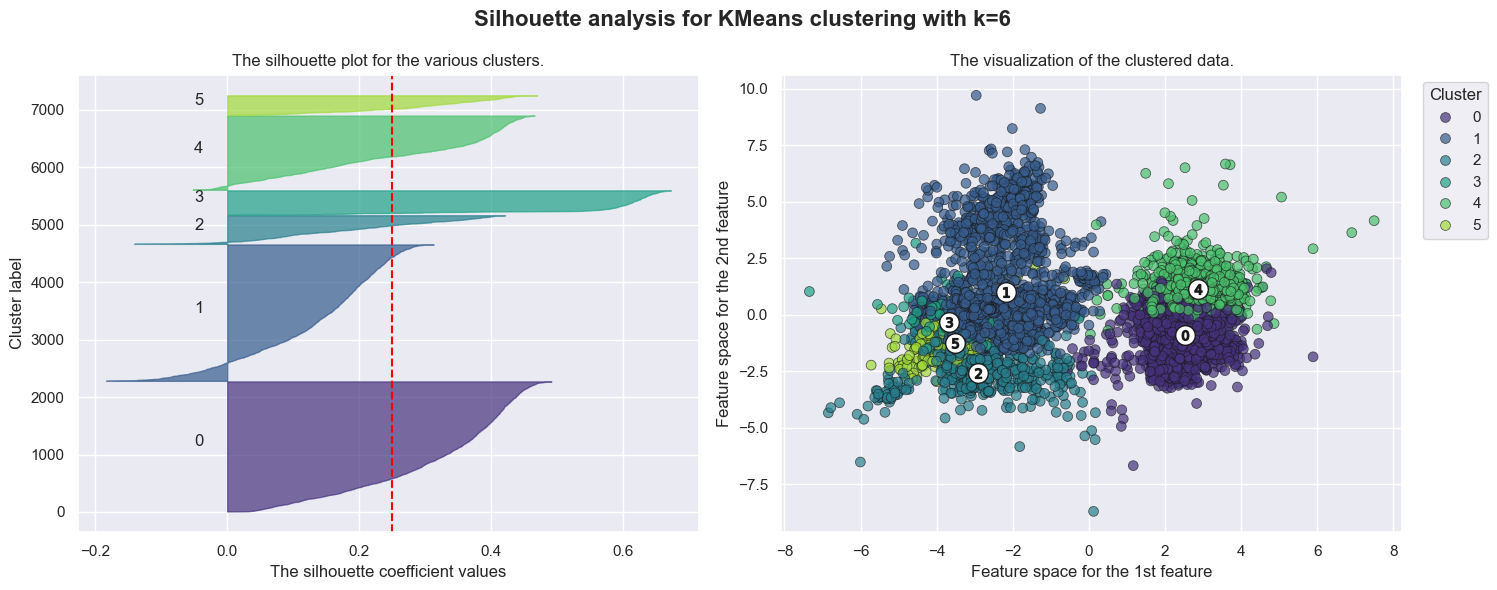

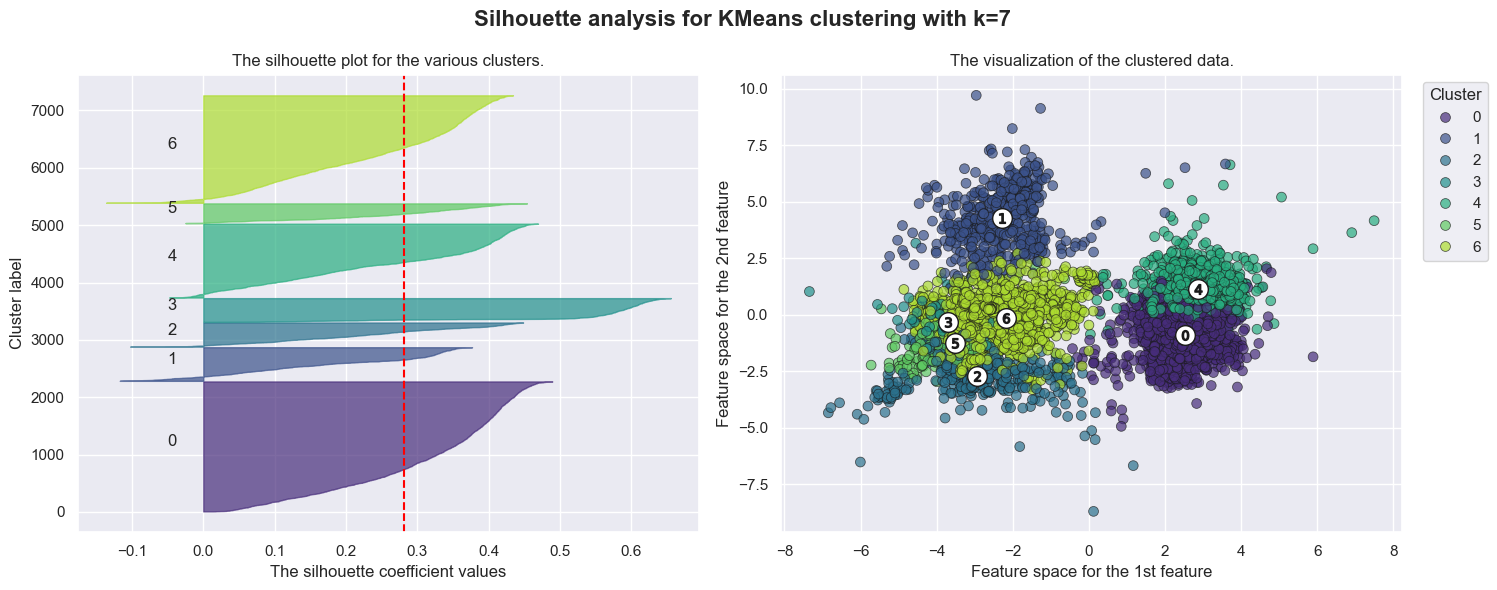

In [ ]:
# PCA for visualization in 2D (optional, only for plotting purposes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Set up range of k values to iterate through
k_values = range(2, 8)

for optimal_k in k_values:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    kmeans_labels = kmeans.fit_predict(data_scaled)

    # Silhouette Analysis
    silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
    silhouette_values = silhouette_samples(data_scaled, kmeans_labels)

    # Plot Silhouette
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f"Silhouette analysis for KMeans clustering with k={optimal_k}", fontsize=16, fontweight='bold')

    # Silhouette plot
    y_lower = 10
    for i in range(optimal_k):
        ith_cluster_silhouette_values = silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = sns.color_palette("viridis", optimal_k)[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for space between clusters

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_title("The silhouette plot for the various clusters.")

    # Scatter plot of the clustered data
    colors = sns.color_palette("viridis", optimal_k)
    sns.scatterplot(
        x=data_pca[:, 0],
        y=data_pca[:, 1],
        hue=kmeans_labels,
        palette=colors,
        ax=ax2,
        s=50,
        alpha=0.7,
        edgecolor="k"
    )
       # Get cluster centers in PCA transformed space
    centers = kmeans.cluster_centers_
    centers_pca = pca.transform(centers)

    # Draw white circles at cluster centers and annotate with cluster numbers
    ax2.scatter(
        centers_pca[:, 0],
        centers_pca[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k"
    )
    for i, c in enumerate(centers_pca):
        ax2.scatter(c[0], c[1], marker=f"${i}$", s=50, edgecolor="k")

    # Set title and labels for scatterplot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.15, 1))

    plt.tight_layout()
    plt.show()

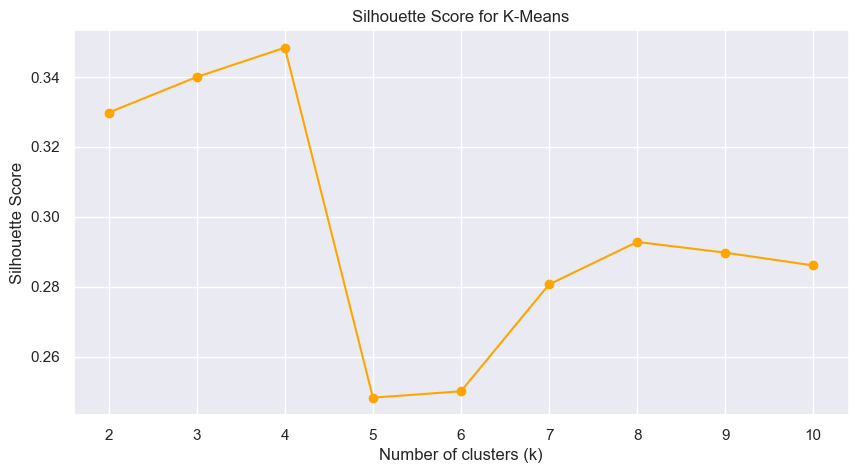

In [ ]:
# Plot Silhouette Score for each k
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means')
plt.show()

* K-Means Clustering
    * Silhouette Score: 0.2806 — Skor ini mengindikasikan bahwa kualitas cluster tidak terlalu baik, dengan sebagian data mungkin berada di antara beberapa cluster.
    * Davies-Bouldin Score: 1.3374 — Semakin rendah nilai ini, semakin baik kualitas clustering. Nilai ini menunjukkan tingkat pemisahan yang cukup baik antar cluster, tetapi bukan yang terbaik.
    * Calinski-Harabasz Score: 1770.32 — Semakin tinggi nilai ini, semakin baik kualitas clustering, terutama untuk cluster yang lebih padat. Skor ini cukup tinggi, menunjukkan bahwa clustering memiliki kepadatan internal yang baik.
* Hierarchical Clustering
    * Silhouette Score: 0.2615 — Skor ini sedikit lebih rendah daripada K-Means, yang mengindikasikan bahwa kualitas cluster mungkin kurang baik dan adanya tumpang tindih antar cluster.
    * Davies-Bouldin Score: 1.3441 — Nilai ini sedikit lebih tinggi dari K-Means, menunjukkan bahwa cluster pada Hierarchical Clustering memiliki pemisahan yang kurang baik dibandingkan K-Means.
    * Calinski-Harabasz Score: 1730.66 — Skor ini lebih rendah daripada K-Means, yang berarti kepadatan internal cluster sedikit lebih rendah dibandingkan hasil K-Means.
* Kesimpulan
    * Kualitas Cluster: Berdasarkan metrik-metrik ini, K-Means sedikit lebih baik daripada Hierarchical Clustering untuk dataset ini. K-Means menunjukkan pemisahan cluster yang lebih baik dan kepadatan internal yang lebih tinggi.
    * Pemilihan Metode: Jika tujuan utama adalah mendapatkan cluster yang lebih terpisah dan padat, maka K-Means adalah pilihan yang lebih baik dibandingkan Hierarchical Clustering untuk dataset ini.

## Online Retail Dataset

In [ ]:
import pandas as pd

path = "Online Retail.csv"

# Membaca hanya 100,000 baris pertama untuk menghemat memori
chunk_size = 1000
df_sample = pd.read_csv(path, nrows=chunk_size)

# Menyimpan subset data menjadi file baru
df_sample.to_csv('OnlineClust1000.csv', index=False)

In [ ]:
df = pd.read_csv('OnlineClust1000.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1,12/01/2010 12:43:00,1.65,14729.0,United Kingdom
996,536520,22100,SKULLS SQUARE TISSUE BOX,1,12/01/2010 12:43:00,1.25,14729.0,United Kingdom
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1,12/01/2010 12:43:00,1.25,14729.0,United Kingdom
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1,12/01/2010 12:43:00,2.55,14729.0,United Kingdom


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info

<bound method DataFrame.info of     InvoiceNo StockCode                          Description  Quantity  \
0      536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365     71053                  WHITE METAL LANTERN         6   
2      536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
..        ...       ...                                  ...       ...   
995    536520     22469                HEART OF WICKER SMALL         1   
996    536520     22100             SKULLS SQUARE TISSUE BOX         1   
997    536520     22096      PINK PAISLEY SQUARE TISSUE BOX          1   
998    536520     22583         PACK OF 6 HANDBAG GIFT BOXES         1   
999    536520     21358           TOAST ITS - HAPPY BIRTHDAY         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
0    12/01/20

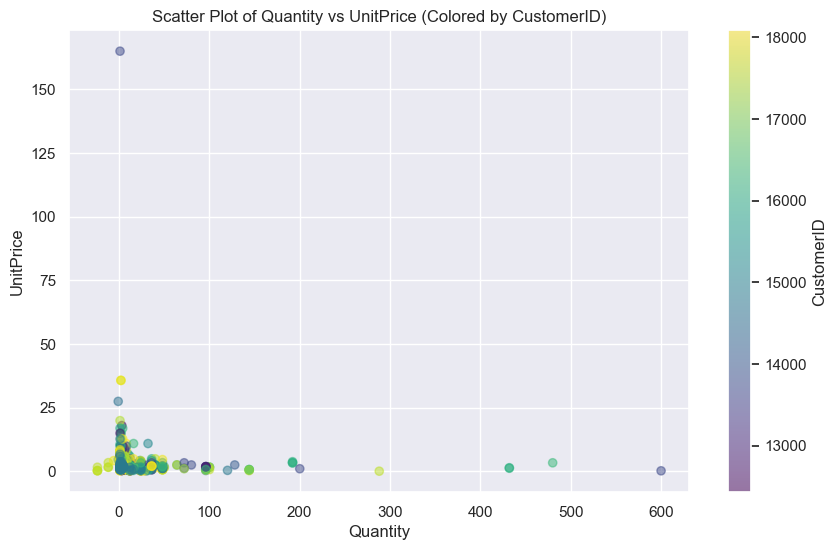

In [ ]:
import matplotlib.pyplot as plt

# Drop unnecessary features for a basic machine learning analysis
# Dropping columns that are typically irrelevant for ML clustering or regression, e.g., textual and ID-based columns
df = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'])

# Drop rows with missing CustomerID values since clustering algorithms need complete data
df = df[['Quantity', 'UnitPrice', 'CustomerID']].dropna()

# Convert CustomerID to integer for clustering purposes
df['CustomerID'] = df['CustomerID'].astype(int)

# Scatter plot for Quantity vs UnitPrice with color representing CustomerID (optional for basic visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['CustomerID'], cmap='viridis', alpha=0.5)
plt.colorbar(label='CustomerID')
plt.title("Scatter Plot of Quantity vs UnitPrice (Colored by CustomerID)")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

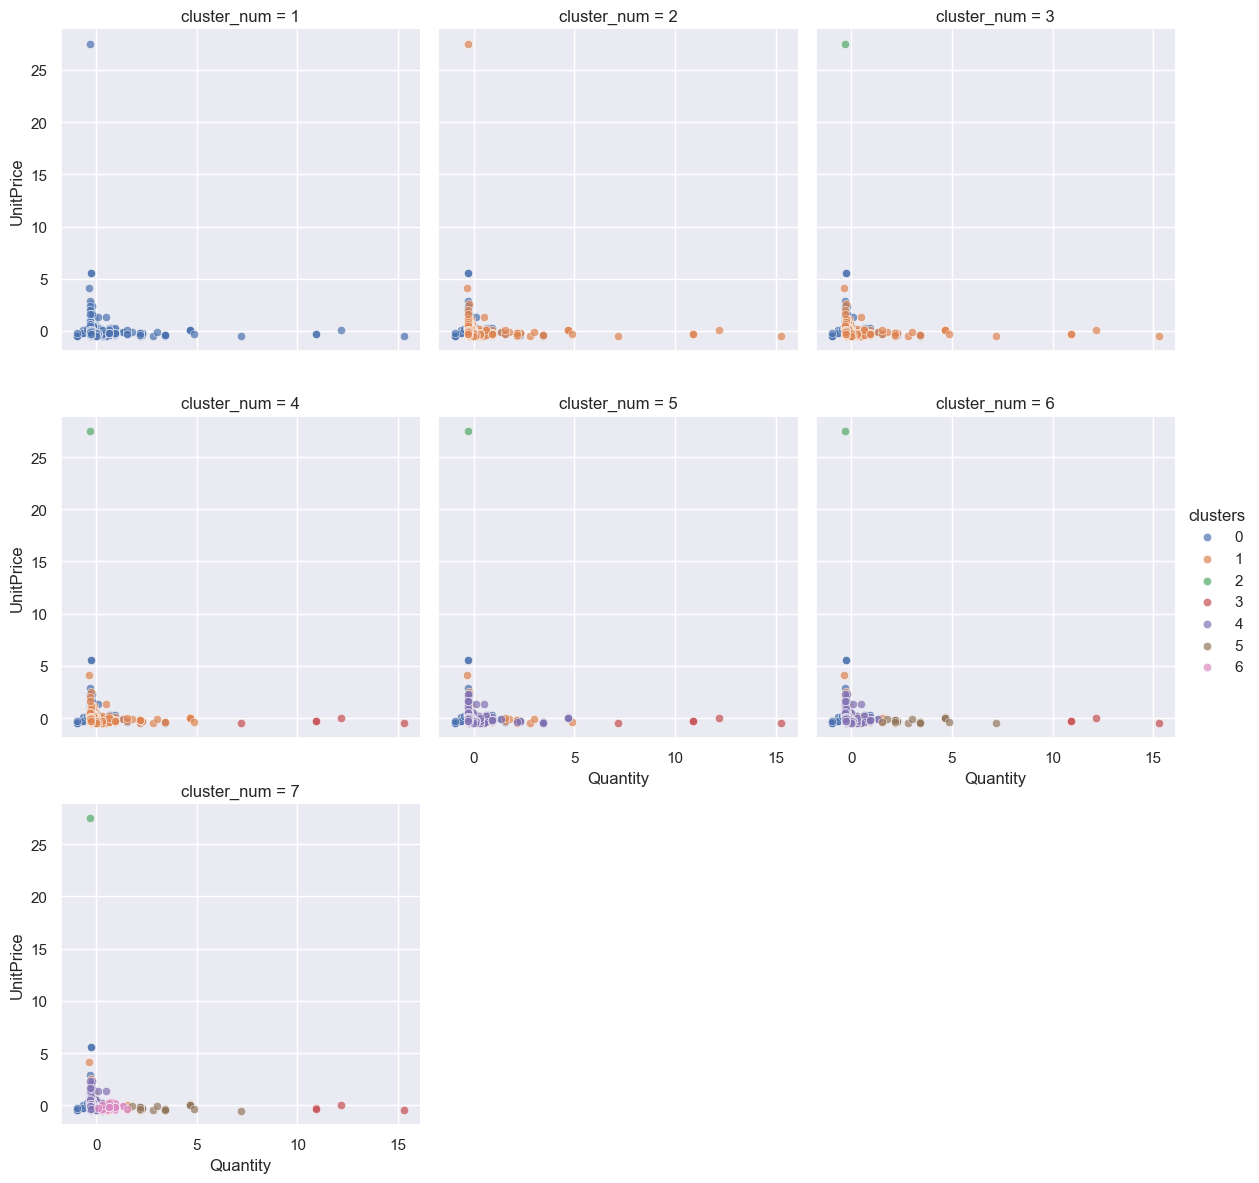

In [ ]:
cluster_data = df[['Quantity', 'UnitPrice', 'CustomerID']].dropna()

# Standardize the data
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data_scaled = scaler.transform(cluster_data)
cluster_data_scaled = pd.DataFrame(cluster_data_scaled, columns=['Quantity', 'UnitPrice', 'CustomerID'])

# Define range of clusters
cluster_range = [1, 2, 3, 4, 5, 6, 7]

# Lists to store inertia and clustering results
inertia_list = []
clustering_result_list = []

# Perform clustering for multiple values of k
for num_clust in cluster_range:
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clust, random_state=0)
    kmeans.fit(cluster_data_scaled)

    # Calculate and store inertia
    inertia_list.append(kmeans.inertia_)

    # Store the clustering results
    current_clustering = cluster_data_scaled.copy()
    current_clustering['clusters'] = kmeans.labels_
    current_clustering['cluster_num'] = num_clust
    clustering_result_list.append(current_clustering)

# Merge results for all values of num_clust
merged_clustering_result = pd.concat(clustering_result_list, axis=0, ignore_index=True)

# Plot all clusterings using FacetGrid
g = sns.FacetGrid(
    merged_clustering_result,
    col="cluster_num",
    col_wrap=3,
    hue="clusters",
    height=4
)
g.map(
    sns.scatterplot,
    'Quantity',
    'UnitPrice',
    alpha=0.7
)
g.add_legend()
plt.show()

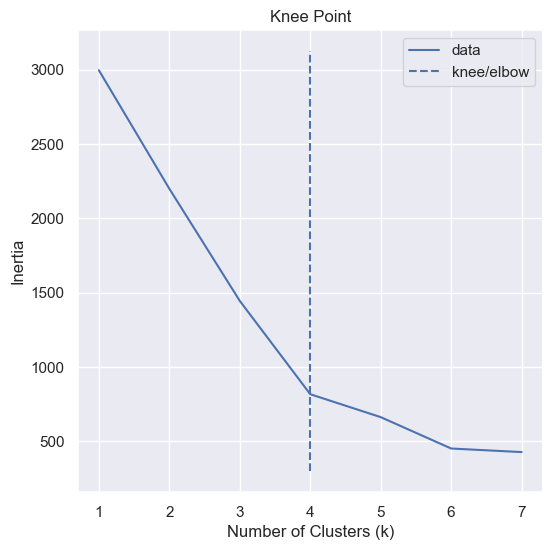

In [ ]:
inertia_list = []
for num_clust in cluster_range:
    kmeans = KMeans(n_clusters=num_clust, random_state=0)
    kmeans.fit(cluster_data_scaled)
    inertia_list.append(kmeans.inertia_)

# Finding the knee/elbow point using KneeLocator
kneedle = KneeLocator(cluster_range, inertia_list, curve="convex", direction="decreasing")

# Plotting the elbow method with knee point
plt.figure(figsize=(6, 6))
plt.plot(cluster_range, inertia_list, label='data')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', label='knee/elbow')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Knee Point")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters for evaluation
optimal_clusters = 3  # Assuming 3 clusters based on elbow method

# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(cluster_data_scaled)

# K-Means Scores
kmeans_silhouette = silhouette_score(cluster_data_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(cluster_data_scaled, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(cluster_data_scaled, kmeans_labels)

# Display the results
results = {
    "K-Means Silhouette Score": kmeans_silhouette,
    "K-Means Davies-Bouldin Score": kmeans_davies_bouldin,
    "K-Means Calinski-Harabasz Score": kmeans_calinski_harabasz,
}

results

{'K-Means Silhouette Score': 0.5061362734696468,
 'K-Means Davies-Bouldin Score': 0.5885676030102657,
 'K-Means Calinski-Harabasz Score': 535.0808038330559}

## Dendograms

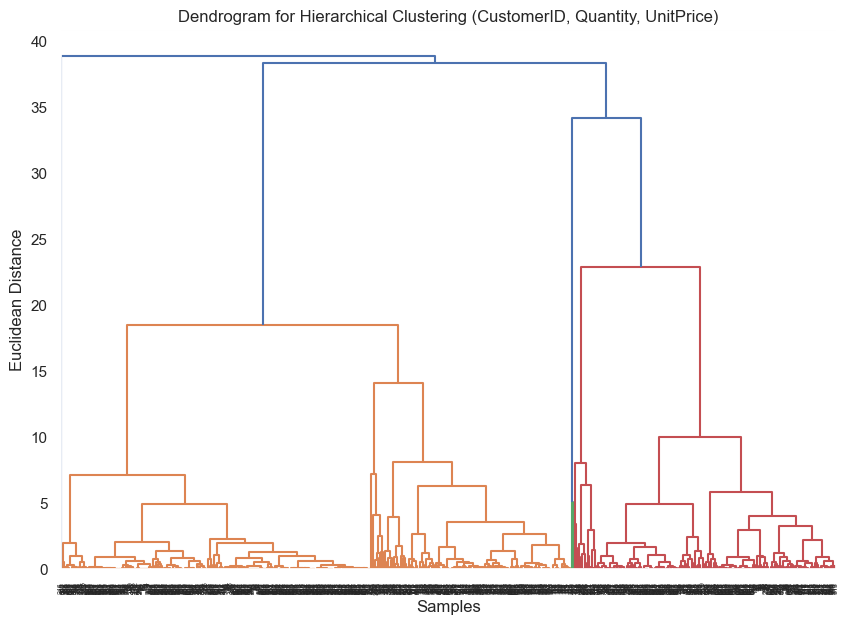

In [ ]:
import scipy.cluster.hierarchy as shc

# Generate and plot the dendrogram for the selected features
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering (CustomerID, Quantity, UnitPrice)")
dendrogram = shc.dendrogram(shc.linkage(cluster_data_scaled, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
# Define the number of clusters based on dendrogram analysis (assuming 3 as an example)
optimal_clusters = 3

# Apply Agglomerative (Hierarchical) Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical_clustering.fit_predict(cluster_data_scaled)

# Calculate evaluation metrics for hierarchical clustering
hierarchical_silhouette = silhouette_score(cluster_data_scaled, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(cluster_data_scaled, hierarchical_labels)
hierarchical_calinski_harabasz = calinski_harabasz_score(cluster_data_scaled, hierarchical_labels)

# Display results
hierarchical_results = {
    "Hierarchical Silhouette Score": hierarchical_silhouette,
    "Hierarchical Davies-Bouldin Score": hierarchical_davies_bouldin,
    "Hierarchical Calinski-Harabasz Score": hierarchical_calinski_harabasz
}

hierarchical_results

{'Hierarchical Silhouette Score': 0.49013549808973905,
 'Hierarchical Davies-Bouldin Score': 0.6446203495886638,
 'Hierarchical Calinski-Harabasz Score': 493.9651260601268}

* K-Means Clustering
    * Silhouette Score: 0.5061 — Ini adalah skor yang relatif baik, menunjukkan bahwa sebagian besar data berada dalam cluster yang tepat dan memiliki pemisahan yang cukup jelas antar cluster.
    * Davies-Bouldin Score: 0.5886 — Skor yang lebih rendah menunjukkan bahwa cluster memiliki pemisahan yang baik dengan sedikit tumpang tindih antar cluster.
    * Calinski-Harabasz Score: 535.08 — Skor yang lebih tinggi menunjukkan bahwa K-Means menghasilkan cluster dengan kepadatan internal yang cukup baik, artinya data dalam setiap cluster lebih homogen.
* Hierarchical Clustering
    * Silhouette Score: 0.4901 — Sedikit lebih rendah dari K-Means, yang menunjukkan bahwa kualitas clustering dengan metode Hierarchical sedikit kurang baik dalam hal pemisahan cluster.
    * Davies-Bouldin Score: 0.6446 — Nilai ini sedikit lebih tinggi daripada K-Means, menunjukkan bahwa cluster yang dihasilkan oleh Hierarchical Clustering memiliki sedikit lebih banyak tumpang tindih dibandingkan K-Means.
    * Calinski-Harabasz Score: 493.97 — Lebih rendah dibandingkan K-Means, yang menunjukkan bahwa cluster yang terbentuk oleh Hierarchical Clustering memiliki kepadatan internal yang lebih rendah.
* Kesimpulan
    * Kualitas Cluster: K-Means menunjukkan hasil clustering yang lebih baik dalam semua metrik dibandingkan dengan Hierarchical Clustering. Ini berarti bahwa K-Means lebih unggul dalam hal pemisahan dan kepadatan cluster untuk dataset ini.
    * Pemilihan Metode: Untuk dataset ini, K-Means tampaknya merupakan pilihan yang lebih baik dibandingkan dengan Hierarchical Clustering, terutama jika tujuannya adalah untuk mendapatkan cluster yang lebih terpisah dan padat.